Exploring the $\chi^2$ distribution
===

Start with some model to generate random data.  <br> 
We'll use $0.2+\frac{sin(x)}{x+1}$ over the range $0\leq x<15$ <br>
Generate $N$ random numbers according to this distribution and make a histogram of the results using 30 bins. 

An easy way to generate random numbers according to an arbitrary distribution is to use rejection sampling (here's a great [decription  of the technique](https://matthewfeickert.github.io/Statistics-Notes/notebooks/simulation/Rejection-Sampling-MC.html) )

1) Make a histogram of your random distribution.  Verify that the the numbers you generated agree with the shape of the function.  Generate at least 10000 points and plot your data in a histogram with errorbars.  You can use numpy+matplotlib+etc, PyROOT, or a mix.  Think about how to appropriately normalize your function, then overlay it with the data.  The normalization depends on the number of bins, the bin range and the number of points thrown.  You may find it easier to first nromalize the area of your function to 1.0, thus turning it into a proper PDF.  

C system headers (glibc/Xcode/Windows SDK) must be installed.
In file included from input_line_4:36:
/sfs/ceph/standard/phys56xx/miniforge3/envs/phys56xx/bin/../lib/gcc/x86_64-conda-linux-gnu/13.3.0/include/c++/cassert:44:10: fatal error: 'assert.h' file not found
#include <assert.h>
         ^~~~~~~~~~
input_line_35:1:10: fatal error: 'dlfcn.h' file not found
#include "dlfcn.h"
         ^~~~~~~~~


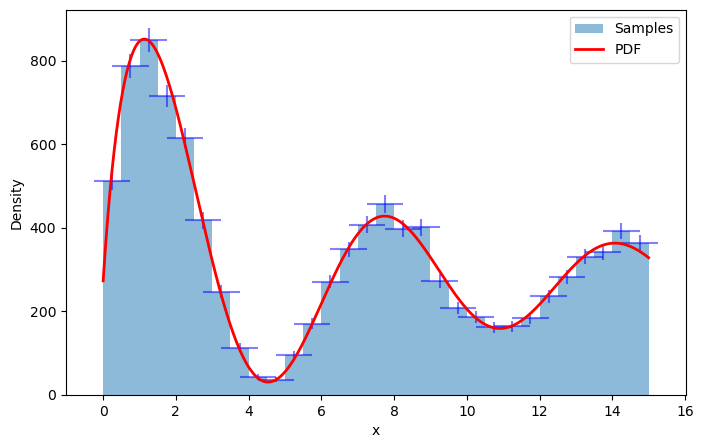

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import ROOT as r

xmin = 0
xmax = 15
nbins = 30

# your work goes here
def func(x):
    return 0.2+np.sin(x)/(x+1)

a = 1/quad(func,xmin,xmax)[0] # normalization for pdf
# print(a)

# our normalized PDF for convenience
def pdf(x):
    return a*func(x)

# normalized pdf in pyroot for generating samples
pdf_r= r.TF1("PDF", "[0]*(0.2+sin(x)/(x+1))",0,15)
pdf_r.SetParameter(0,a)


x_vals = np.linspace(xmin,xmax,1000)
y_vals = pdf(x_vals)

# Number of samples we want
N_samples = 10000
samples = np.zeros(N_samples)

# draw samples from distribution
for i in range(N_samples):
    samples[i] = pdf_r.GetRandom()

# while len(samples) < N_samples:
#     # Step 1: sample x uniformly from the domain
#     x = np.random.uniform(xmin, xmax)
    
#     # Step 2: sample y uniformly from [0, 1]
#     y = np.random.uniform(0, 1)
    
#     # Step 3: accept if y < pdf(x)
#     if y < pdf(x):
#         samples.append(x)

# samples = np.array(samples)


# Plot the results
plt.figure(figsize=(8,5))
bins = plt.hist(samples, bins=nbins, alpha=0.5, label='Samples')
yb=bins[0]  # count in each bin
xb=bins[1]  # bin edges
dx = xb[1]-xb[0] # bin width
hist_area = N_samples*dx
err=np.sqrt(yb)
#Calculate bin centers (you can probably find a smarter way to do this!)
bc=(xb[1:]-xb[:-1])/2+xb[:-1]
plt.errorbar(bc, yb, yerr=err, xerr=dx, fmt="none", color="b", alpha=0.5)
plt.plot(x_vals, pdf(x_vals)*hist_area, 'r', lw=2, label='PDF')
# plt.plot(x_vals, func(x_vals), 'g', lw=2, label='PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


2) Repeat the above experiment at least 1000 times.  For each experiment calculate the $\chi^2$ of your data with respect to your (properly normalized) model.  Plot (histogram) the $\chi^2$ distribution and compare it to the functional form of the $\chi^2(ndof=30)$ distribution.  You can find the form of the $\chi^2(ndof)$ PDF function in many places and implement it using the Gamma function or use a premade function, eg:
* [wikipedia](https://en.wikipedia.org/wiki/Chi-squared_distribution)
* [scipy.stats.chi2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2)

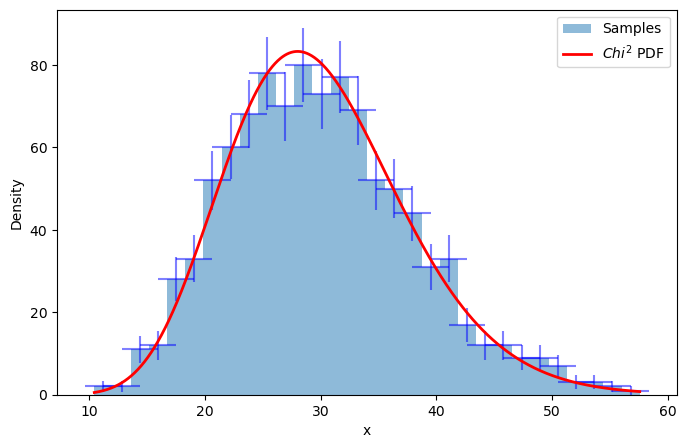

In [5]:
import scipy.stats as sp_stats

# your work goes here
N_trials = 1000
N_samples = 10000
nbins = 30

def chi_squared(x, y, y_err, model_func, area):
    # scale model func pdf by area of the histogram
    y_model = area*model_func(x)
    residuals = (y - y_model) / y_err
    chi2 = np.sum(residuals**2)
    return chi2


chi2_samples = np.zeros(N_trials)

for i in range(N_trials):
    samples = np.zeros(N_samples)

    for j in range(N_samples):
        samples[j] = pdf_r.GetRandom()

    hist, bin_edges = np.histogram(samples, bins=nbins)
    dx = bin_edges[1]-bin_edges[0] # bin width
    hist_area = N_samples*dx # area of the histogram
    bc=(bin_edges[1:]-bin_edges[:-1])/2+bin_edges[:-1] # bin centers
    err=np.sqrt(hist) # error of each bin
    chi2_samples[i]=chi_squared(bc, hist, err, pdf, hist_area)


chi2_xvals = np.linspace(chi2_samples.min(),chi2_samples.max(),1000)

# Plot the results
plt.figure(figsize=(8,5))
bins = plt.hist(chi2_samples, bins=nbins, alpha=0.5, label='Samples')
yb=bins[0]  # count in each bin
xb=bins[1]  # bin edges
dx = xb[1]-xb[0] # bin width
hist_area = N_trials*dx
err=np.sqrt(yb)
#Calculate bin centers (you can probably find a smarter way to do this!)
bc=(xb[1:]-xb[:-1])/2+xb[:-1]
plt.errorbar(bc, yb, yerr=err, xerr=dx, fmt="none", color="b", alpha=0.5)
plt.plot(chi2_xvals, sp_stats.chi2.pdf(chi2_xvals,df=nbins)*hist_area, 'r', lw=2, label=r'${Chi}^2$ PDF')
# plt.plot(x_vals, func(x_vals), 'g', lw=2, label='PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()



**Only required for Phys5630**

3) Modify your code above to perform the following study. <br>
Repeat (2) for nbins = $ndof = 30, 50, 75, 100$ and calculate the reduced $\chi^2$, eg $\chi^2/ndof$ for each experiment.  Plot the mean value of the reduced $\chi^2$ with errorbars versus $ndof$.  Make a table comparing your calculations to the expected results.

/tmp/ipykernel_316259/2213345089.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


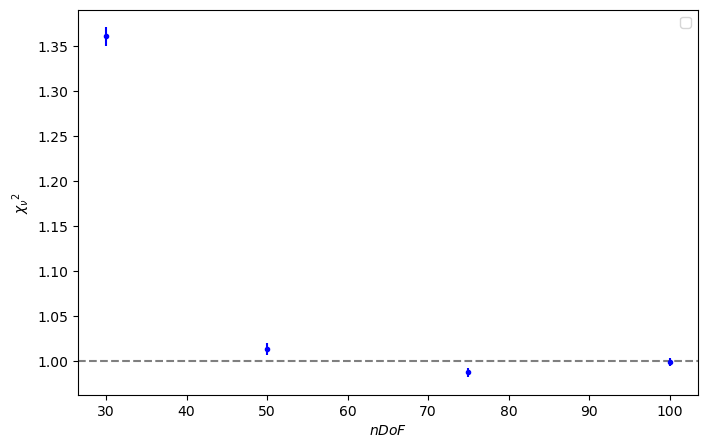

In [2]:
# your work goes here
N_trials = 1000
N_samples = 100000
nbins = np.array([30,50,75,100])

def chi_squared(x, y, y_err, model_func, area):
    # scale model func pdf by area of the histogram
    y_model = area*model_func(x)
    residuals = (y - y_model) / y_err
    chi2 = np.sum(residuals**2)
    return chi2



chi2_mean = np.zeros(nbins.size)
chi2_err = np.zeros(nbins.size)

for k in range(nbins.size):
    chi2_samples = np.zeros(N_trials)
    for i in range(N_trials):
        samples = np.zeros(N_samples)

        for j in range(N_samples):
            samples[j] = pdf_r.GetRandom()

        hist, bin_edges = np.histogram(samples, bins=nbins[k])
        dx = bin_edges[1]-bin_edges[0] # bin width
        hist_area = N_samples*dx # area of the histogram
        bc=(bin_edges[1:]-bin_edges[:-1])/2+bin_edges[:-1] # bin centers
        err=np.sqrt(hist) # error of each bin
        chi2_samples[i]=chi_squared(bc, hist, err, pdf, hist_area)

    chi2_mean[k] = chi2_samples.mean()
    chi2_err[k] = chi2_samples.std()/np.sqrt(N_trials)

chi2_red = chi2_mean/nbins
chi2_red_err = chi2_err/nbins

# chi2_xvals = np.linspace(chi2_samples.min(),chi2_samples.max(),1000)
    

# Plot the results
plt.figure(figsize=(8,5))
plt.errorbar(nbins, chi2_red, yerr=chi2_red_err, fmt=".", color="b", alpha=1)
# print(nbins)
# plt.plot(chi2_xvals, sp_stats.chi2.pdf(chi2_xvals,df=nbins)*hist_area, 'r', lw=2, label=r'${Chi}^2$ PDF')
# plt.plot(x_vals, func(x_vals), 'g', lw=2, label='PDF')
plt.axhline(y=1.,color="black",ls="--", alpha=0.5)
plt.xlabel(r'$n DoF$')
plt.ylabel(r'${\chi_\nu}^2$')
plt.legend()
plt.show()



In [3]:
import pandas as pd

data = {
    "N DoF": nbins,
    "Chi^2/DoF Exp": np.ones(chi2_red.size),
    "$Chi^2/DoF Calc": chi2_red,
    "Error": chi2_red_err
}

df = pd.DataFrame(data)
df.to_csv("red_chi2_results")
print(df)

   N DoF  Chi^2/DoF Exp  $Chi^2/DoF Calc     Error
0     30            1.0         1.361176  0.010187
1     50            1.0         1.013592  0.006558
2     75            1.0         0.987602  0.005251
3    100            1.0         0.999225  0.004644


In [3]:
# your work goes here